In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [12]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if df[i].nunique()>7:
    numerical_features.append(i)
  else:
    categorical_features.append(i)

In [13]:
for i in categorical_features:
  print(f'{i} has {df[i].unique()} categories. \n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories. 

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories. 

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories. 

red_blood_cells has [nan 'normal' 'abnormal'] categories. 

pus_cell has ['normal' 'abnormal' nan] categories. 

pus_cell_clumps has ['notpresent' 'present' nan] categories. 

bacteria has ['notpresent' 'present' nan] categories. 

hypertension has ['yes' 'no' nan] categories. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories. 

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories. 

appetite has ['good' 'poor' nan] categories. 

pedal_edema has ['no' 'yes' nan] categories. 

anemia has ['no' 'yes' nan] categories. 

classification has ['ckd' 'ckd\t' 'notckd'] categories. 



In [10]:
cols_names={"bp":"blood_pressure", "sg":"specific_gravity", "al":"albumin", "su":"sugar", "rbc":"red_blood_cells", "pc":"pus_cell", "pcc":"pus_cell_clumps", "ba":"bacteria", "bgr":"blood_glucose_random", "bu":"blood_urea", "sc":"serum_creatinine", "sod":"sodium", "pot":"potassium", "hemo":"haemoglobin", "pcv":"packed_cell_volume", "wc":"white_blood_cell_count", "rc":"red_blood_cell_count", "htn":"hypertension", "dm":"diabetes_mellitus", "cad":"coronary_artery_disease", "appet":"appetite", "pe":"pedal_edema", "ane":"anemia"}
df.rename(columns=cols_names, inplace=True)

In [25]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'}) 
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no') 
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')


In [26]:
for i in categorical_features:
  print(f'{i} has {df[i].unique()} categories. \n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories. 

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories. 

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories. 

red_blood_cells has [nan 'normal' 'abnormal'] categories. 

pus_cell has ['normal' 'abnormal' nan] categories. 

pus_cell_clumps has ['notpresent' 'present' nan] categories. 

bacteria has ['notpresent' 'present' nan] categories. 

hypertension has ['yes' 'no' nan] categories. 

diabetes_mellitus has ['yes' 'no' nan] categories. 

coronary_artery_disease has ['no' 'yes' nan] categories. 

appetite has ['good' 'poor' nan] categories. 

pedal_edema has ['no' 'yes' nan] categories. 

anemia has ['no' 'yes' nan] categories. 

classification has ['ckd' 'notckd'] categories. 



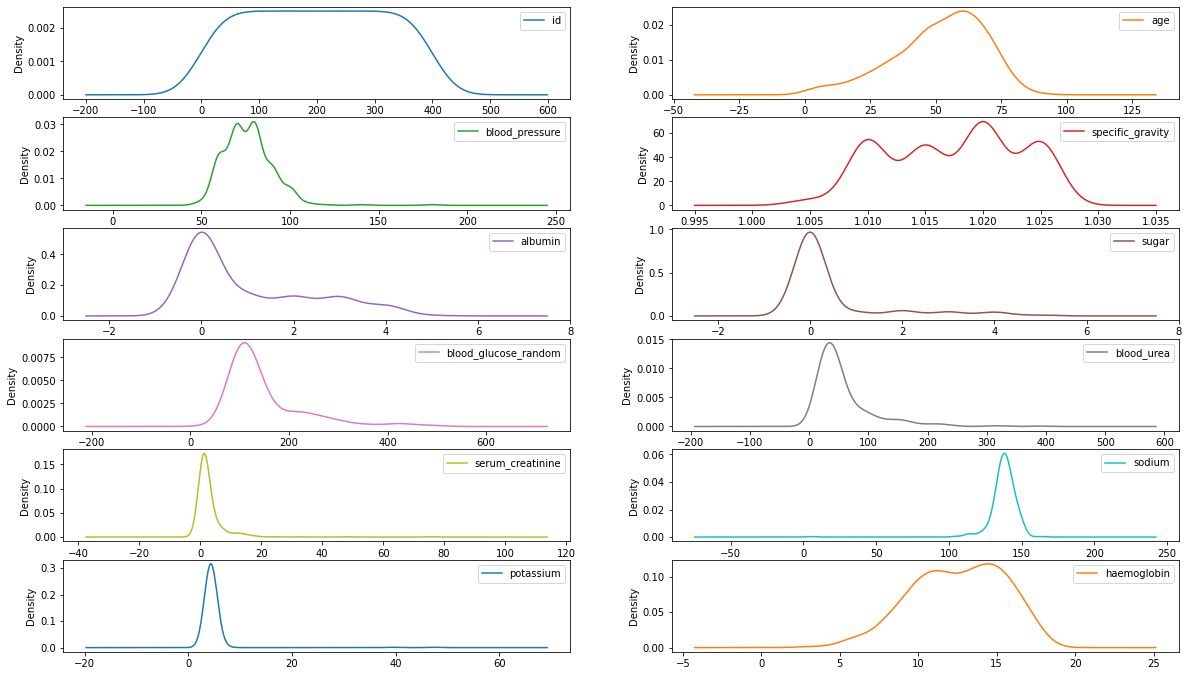

In [32]:
# Distribution of numerical features
df.plot(sharex=False,layout = (10,2), subplots = True,figsize = (20,20),kind = 'density')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

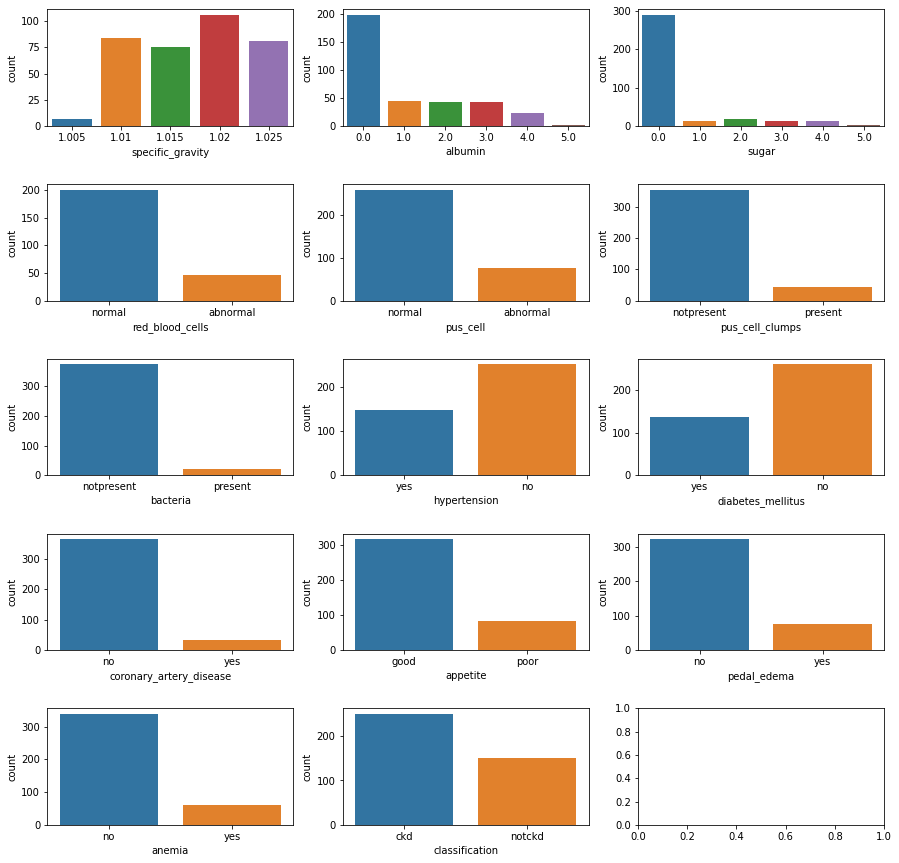

In [33]:
# Distribution of categorical features
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

for ax,feats in zip(axes.flatten(), categorical_features):
  sns.countplot(df[feats],ax=ax)


ckd       250
notckd    150
Name: classification, dtype: int64

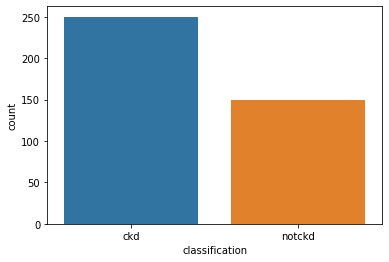

In [34]:
sns.countplot(x='classification',data=df)
df['classification'].value_counts()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

In [45]:
temp_df = pd.read_csv('kidney_disease.csv')
temp_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [47]:
temp_df[['htn','dm','cad','pe','ane']] = temp_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
temp_df[['rbc','pc']] = temp_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
temp_df[['pcc','ba']] = temp_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
temp_df[['appet']] = temp_df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
temp_df['classification'] = temp_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
temp_df.rename(columns={'classification':'class'},inplace=True)
temp_df['pe'] = temp_df['pe'].replace(to_replace='good',value=0)
temp_df['appet'] = temp_df['appet'].replace(to_replace='no',value=0)
temp_df['cad'] = temp_df['cad'].replace(to_replace='\tno',value=0)
temp_df['dm'] = temp_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
temp_df.drop('id',axis=1,inplace=True)
temp_df = temp_df.dropna(axis=0)
cols = ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc']
X = temp_df[cols]
y = temp_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44, stratify= y)

In [50]:
model = RandomForestClassifier()

In [51]:

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

98.11320754716981

In [53]:
joblib.dump(model,r"kidney_disease_model")

['kidney_disease_model']